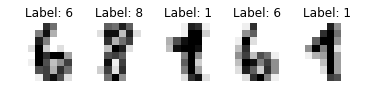

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline

digits = datasets.load_digits()
    
# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
mnist_data = digits.images.reshape((n_samples, -1)).astype(float)
labels = digits.target.astype(int)

# choose some random images to display
indices = np.arange(len(digits.images))
display = np.random.choice(indices, size=5)

for i, image in enumerate(digits.images[display]):
    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title("Label: %d" % digits.target[display[i]])
plt.show()


In [14]:
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

labels = to_categorical(labels)

train_to_test_ratio = 0.8
X_train, X_test, Y_train, Y_test = train_test_split(mnist_data, labels, train_size=train_to_test_ratio)


/home/andreas/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [19]:
from sklearn.metrics import accuracy_score

epochs = 100
batch_size = 100
n_features = X_train.shape[1]
n_neurons_layer1 = 100
n_neurons_layer2 = 50
n_categories = 10

eta_vals = np.logspace(-5, 0, 6)
lmbd_vals = np.logspace(-5, 0, 6)


In [25]:
from keras.models import Sequential
from keras.layers import Dense

def create_DNN(n_features, n_neurons_layer1, n_neurons_layer2, n_categories):
    model = Sequential()
    model.add(Dense(n_neurons_layer1, input_dim=n_features, activation='sigmoid'))
    model.add(Dense(n_neurons_layer1, activation='sigmoid'))
    model.add(Dense(n_categories, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
    
    return model

model = create_DNN(n_features, n_neurons_layer1, n_neurons_layer2, n_categories)
model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, verbose=0)

scores = model.evaluate(X_test, Y_test)
print("Accuracy: %.3f" % scores[1])

360/360 [==============================] - 0s 158us/step
Accuracy: 0.881
